# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [7]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [8]:
no_training_epochs = 5

### 1.3 Data examination

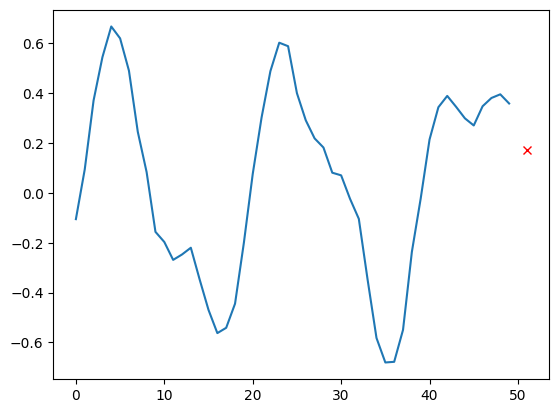

In [12]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [25]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

In [26]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [27]:
model_linear.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2934 - mean_squared_error: 0.2934 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0432 - mean_squared_error: 0.0432 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0107 - val_mean_squared_error: 0.0107


In [29]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

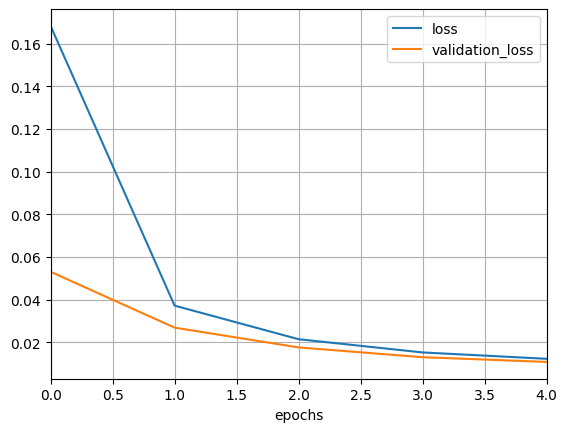

In [31]:
plot_function(history_linear)

In [32]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.010813552886247635
Test MSE:  0.010813552886247635


### 1.5 Simple RNN Model

In [40]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [41]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [42]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2961 - mean_squared_error: 0.2961 - val_loss: 0.1959 - val_mean_squared_error: 0.1959
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1575 - mean_squared_error: 0.1575 - val_loss: 0.0883 - val_mean_squared_error: 0.0883
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0758 - mean_squared_error: 0.0758 - val_loss: 0.0526 - val_mean_squared_error: 0.0526
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0439 - val_mean_squared_error: 0.0439
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0419 - mean_squared_error: 0.0419 - val_loss: 0.0390 - val_mean_squared_error: 0.0390


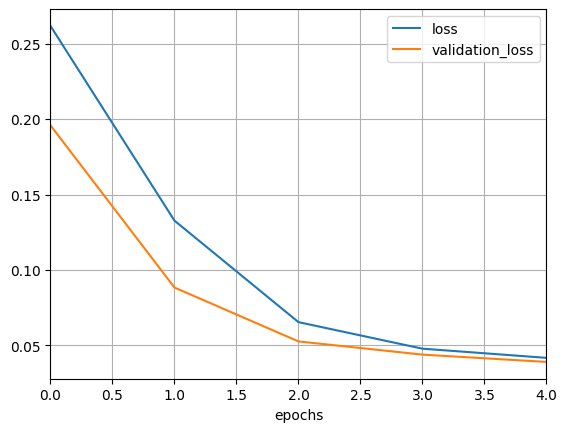

In [43]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [45]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [46]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [47]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


In [56]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003211398608982563
Test MSE:  0.003211398608982563


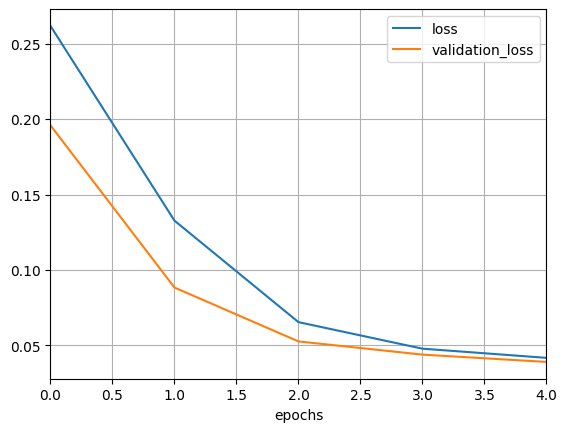

In [55]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [101]:
#from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [64]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [69]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [79]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [80]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [82]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [99]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [95]:
optimizer = Adam(learning_rate = 0.001)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [97]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.4997 - loss: 0.7067 - val_accuracy: 0.5096 - val_loss: 0.6930
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4996 - loss: 0.6961 - val_accuracy: 0.4938 - val_loss: 0.6953
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4977 - loss: 0.6950 - val_accuracy: 0.4938 - val_loss: 0.6968
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.4969 - loss: 0.6967 - val_accuracy: 0.4938 - val_loss: 0.6945
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4996 - loss: 0.6953 - val_accuracy: 0.4938 - val_loss: 0.6988


In [124]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print(f'Test accuracy: ', score1[1]*100, "%")

ValueError: You must call `compile()` before using the model.

TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

network LSTM:

In [104]:
embed_size = 128
vocabulary_size = 1000

model1 = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer1 = Adam(learning_rate = 0.001)

model1.compile(loss="binary_crossentropy", optimizer=optimizer1, metrics=["accuracy"])

history = model1.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.5158 - loss: 0.6930 - val_accuracy: 0.5538 - val_loss: 0.6898
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5353 - loss: 0.6884 - val_accuracy: 0.5068 - val_loss: 0.7145
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5522 - loss: 0.6887 - val_accuracy: 0.6920 - val_loss: 0.6340
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.6464 - loss: 0.6411 - val_accuracy: 0.7880 - val_loss: 0.4643
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8077 - loss: 0.4254 - val_accuracy: 0.8134 - val_loss: 0.4157


In [115]:
score2 = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print(f'Test accuracy: ', score2[1]*100, "%")

Test loss: 0.40397149324417114
Test accuracy:  81.66800141334534 %


GRU network:

In [109]:
embed_size = 128
vocabulary_size = 1000

model2 = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer2 = Adam(learning_rate = 0.001)

model2.compile(loss="binary_crossentropy", optimizer=optimizer2, metrics=["accuracy"])

history = model2.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.5235 - loss: 0.6913 - val_accuracy: 0.5062 - val_loss: 0.7039
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5960 - loss: 0.6234 - val_accuracy: 0.8252 - val_loss: 0.3914
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8436 - loss: 0.3606 - val_accuracy: 0.8270 - val_loss: 0.3769
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8605 - loss: 0.3200 - val_accuracy: 0.8314 - val_loss: 0.3884
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8676 - loss: 0.3050 - val_accuracy: 0.8282 - val_loss: 0.4050


In [117]:
score3 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print(f'Test accuracy: ', score3[1]*100, "%")

Test loss: 0.4005328118801117
Test accuracy:  82.4999988079071 %


testing best acuracy


In [ ]:
embed_size = 128
vocabulary_size = 1000

model3 = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
     keras.layers.GRU(128, return_sequences=True),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer3 = Adam(learning_rate = 0.001)

model3.compile(loss="binary_crossentropy", optimizer=optimizer3, metrics=["accuracy"])

history = model3.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.5350 - loss: 0.6869 - val_accuracy: 0.7446 - val_loss: 0.5543
Epoch 2/10
508/625 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6286 - loss: 0.6306

In [123]:
scorebest = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scorebest[0])
print(f'Test accuracy: ', scorebest[1]*100, "%")

Test loss: 0.42459940910339355
Test accuracy:  81.76800012588501 %
